# 4. What is the recommended length of a course and lectures, and what category will demand less time to create a course?
Let's find which category requires less time to create a course with a high number of subscribers in mind.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Course_info.csv')

In [3]:
df = data[['num_subscribers', 'category', 'content_length_min', 'num_lectures']].copy()

In [4]:
df['avg_lecture_duration'] = data['content_length_min']/data['num_lectures']

## 4.1 Analyzing the distributions
First I would like to see how the average duration of a lecture is distributed and also analyze the number of subscribers. For this I will use the logarithm transformation to better characterize the data.

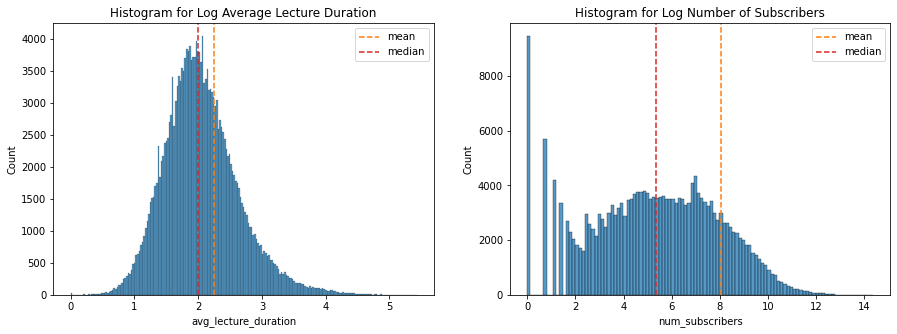

In [5]:
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,2,1)
mean_avg_lecture_duration = df['avg_lecture_duration'].mean()
median_avg_lecture_duration = df['avg_lecture_duration'].quantile(0.50)

sns.histplot(np.log1p(df['avg_lecture_duration']))

plt.axvline(x=np.log1p(mean_avg_lecture_duration),
            color='C1', linestyle='--', label='mean')

plt.axvline(x=np.log1p(median_avg_lecture_duration),
            color='C3', linestyle='--', label='median')
plt.title('Histogram for Log Average Lecture Duration')
plt.legend()

plt.subplot(1,2,2)
mean_num_subscribers = df['num_subscribers'].mean()
median_num_subscribers = df['num_subscribers'].quantile(0.50)

sns.histplot(np.log1p(df['num_subscribers']))

plt.axvline(x=np.log1p(mean_num_subscribers),
            color='C1', linestyle='--', label='mean')

plt.axvline(x=np.log1p(median_num_subscribers),
            color='C3', linestyle='--', label='median')
plt.title('Histogram for Log Number of Subscribers')
plt.legend()

plt.show()

## 4.2 Finer analysis
A finer analysis will be developed using the `category` feature. The idea here will be to see the differences in each category and compare:
- the lecture duration
- number of subscribers
- number of lectures
- spent time on a course
- amount of subscribers over the time devoted to develop a course

In [6]:
categories = df['category'].unique()

In [7]:
results = []
for cat in categories:
    mean_duration = df[df['category']==cat]['avg_lecture_duration'].mean()
    median_duration = df[df['category']==cat]['avg_lecture_duration'].quantile(0.5)
    
    mean_subs = df[df['category']==cat]['num_subscribers'].mean()
    median_subs = df[df['category']==cat]['num_subscribers'].quantile(0.5)
    
    mean_lect = df[df['category']==cat]['num_lectures'].mean()
    median_lect = df[df['category']==cat]['num_lectures'].quantile(0.5)
    
    results.append(list((cat, np.round(mean_duration,2), np.round(median_duration,2),
                        np.round(mean_subs,2), np.round(median_subs,2),
                        np.round(mean_lect,2), np.round(median_lect,2))))

In [8]:
pd_results = pd.DataFrame(results)
pd_results.rename(columns={0:'category', 1:'mean_duration', 2:'median_duration',
                          3:'mean_subs', 4:'median_subs',
                          5:'mean_lect', 6:'median_lect'}, inplace=True)
pd_results.set_index('category', inplace=True)

pd_results['median_spent_time'] = np.round(pd_results['median_duration']*pd_results['median_lect']/60,2)
pd_results['median_subs_per_hour'] = np.round(pd_results['median_subs']/pd_results['median_spent_time'],2)

pd_results.sort_values(by=['median_subs'], ascending=False)

,mean_duration,median_duration,mean_subs,median_subs,mean_lect,median_lect,median_spent_time,median_subs_per_hour
category,,,,,,,,
Development,8.27,6.78,6755.04,703.0,62.00,38.0,4.29,163.87
Office Productivity,7.81,5.60,4385.18,345.0,48.71,31.0,2.89,119.38
Marketing,7.35,5.83,3636.31,312.0,30.26,20.0,1.94,160.82
IT & Software,9.12,6.88,3503.16,256.0,35.61,20.0,2.29,111.79
Design,9.54,7.39,3145.59,240.5,40.37,25.0,3.08,78.08
Business,7.72,5.75,2837.94,229.0,29.90,20.0,1.92,119.27
Photography & Video,7.25,5.80,3549.12,220.5,32.79,22.0,2.13,103.52
Finance & Accounting,9.62,6.73,2253.38,152.0,30.11,19.0,2.13,71.36
Music,7.01,5.32,1423.83,144.0,35.00,24.0,2.13,67.61


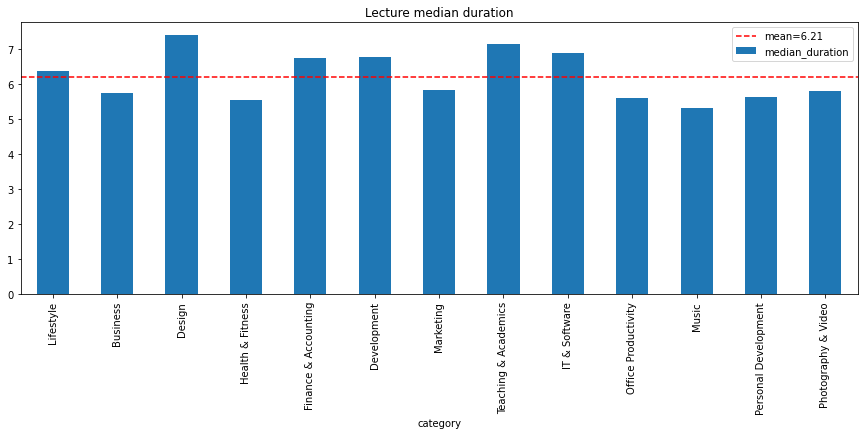

In [9]:
key = 'median_duration'
mean_median = pd_results[key].mean()
pd_results[[key]].plot.bar()
plt.axhline(y=mean_median, color='red', linestyle='--', 
            label='mean={}'.format(str(np.round(mean_median,2))))
plt.title('Lecture median duration')
plt.legend()
plt.show()

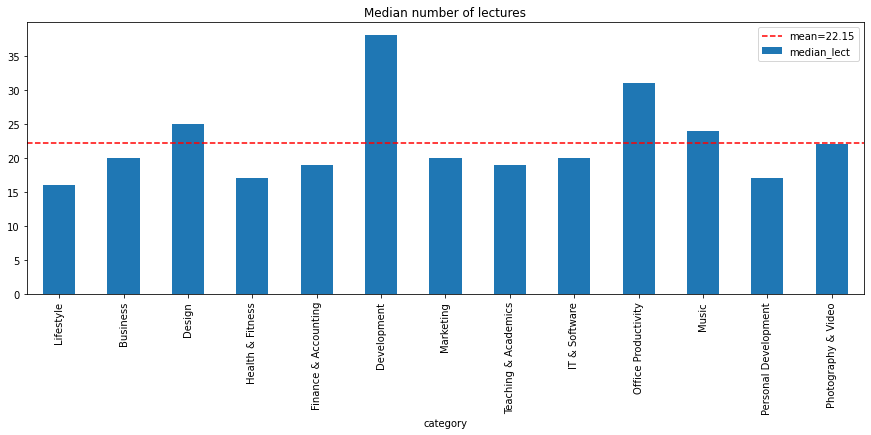

In [10]:
key = 'median_lect'
mean_median = pd_results[key].mean()
pd_results[[key]].plot.bar()
plt.axhline(y=mean_median, color='red', linestyle='--', 
            label='mean={}'.format(str(np.round(mean_median,2))))
plt.title('Median number of lectures')
plt.legend()
plt.show()

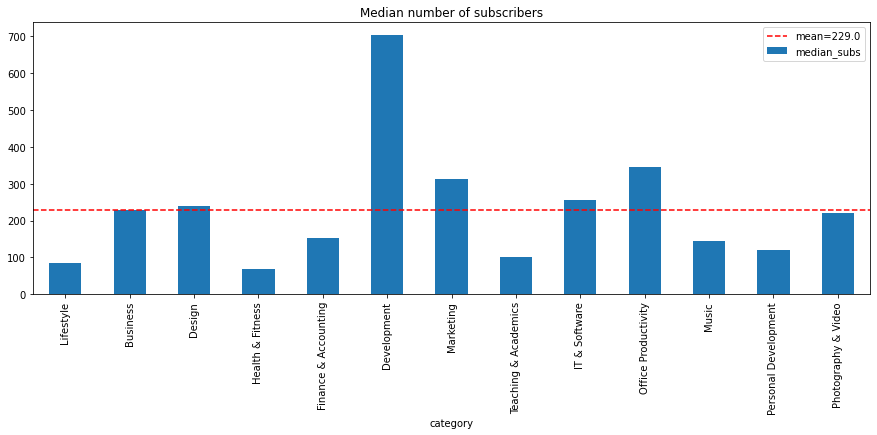

In [11]:
key = 'median_subs'
mean_median = pd_results[key].mean()
pd_results[[key]].plot.bar()
plt.axhline(y=mean_median, color='red', linestyle='--', 
            label='mean={}'.format(str(np.round(mean_median,2))))
plt.title('Median number of subscribers')
plt.legend()
plt.show()

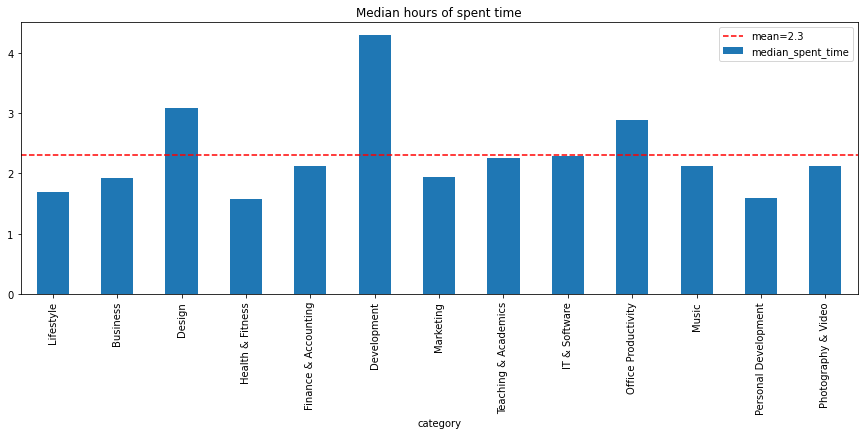

In [12]:
key = 'median_spent_time'
mean_median = pd_results[key].mean()
pd_results[[key]].plot.bar()
plt.axhline(y=mean_median, color='red', linestyle='--', 
            label='mean={}'.format(str(np.round(mean_median,2))))
plt.title('Median hours of spent time')
plt.legend()
plt.show()

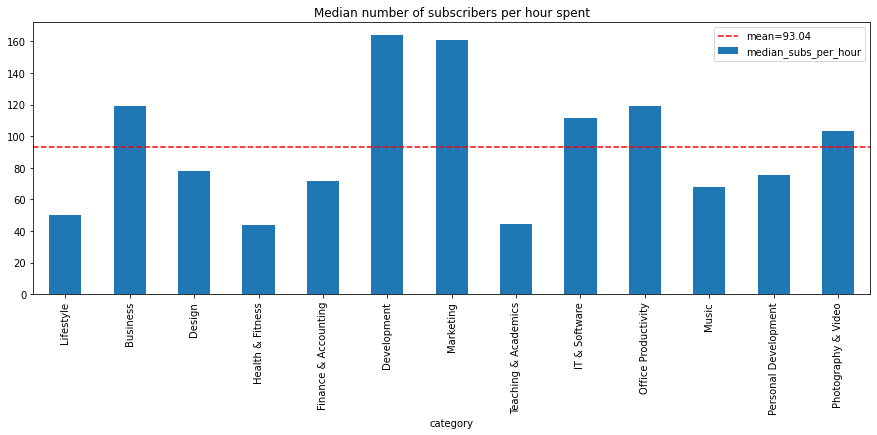

In [13]:
key = 'median_subs_per_hour'
mean_median = pd_results[key].mean()
pd_results[[key]].plot.bar()
plt.axhline(y=mean_median, color='red', linestyle='--', 
            label='mean={}'.format(str(np.round(mean_median,2))))
plt.title('Median number of subscribers per hour spent')
plt.legend()
plt.show()

## 4.3 Conclusion
It can be seen that on average almost all lectures take similar time, but the total number of lectures is higher for `Development` courses which means that it will take more than 4 hours to create a course. In comparison, a `Marketing` course will take around 2 hours to complete and in both cases, the average number of subscribers per hour will be very similar. Therefore, a good idea for a small duration course can be a `Marketing` one, but if you want a higher reach of subscribers, a `Development` course will be the best option, just remember that it will take almost double the time to create it.